### 通し課題 : Car Fuel Consumption
- 100Kmあたりのガソリン消費量(consume)を予測する
- 不明点
    - 強い相関のある説明変数が確認できなかった。

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
# CSVファイルを読み込む
df_consume = pd.read_csv("../1_data/measurements.csv")

In [46]:
# データの概要を確認する
df_consume.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [48]:
# データの概要を確認する
df_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null object
consume          388 non-null object
speed            388 non-null int64
temp_inside      376 non-null object
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [49]:
# データの概要を確認する
df_consume.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [50]:
# 必要な項目のみ抜き出す
df_consume_ext = df_consume.copy()[["distance", "consume", "speed", "temp_inside", "temp_outside", "gas_type", "AC", "rain", "sun"]]

In [51]:
# 抜き出したデータフレームを表示する
df_consume_ext.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [52]:
# , を .に置換する
df_consume_ext["distance"] = df_consume_ext["distance"].str.replace(",", ".")
df_consume_ext["consume"] = df_consume_ext["consume"].str.replace(",", ".")
df_consume_ext["temp_inside"] = df_consume_ext["temp_inside"].str.replace(",", ".")

In [53]:
# 正しく変換されたか確認する
df_consume_ext.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [54]:
# 型を変換する
df_consume_ext["distance"] = df_consume_ext["distance"].astype(float)
df_consume_ext["consume"] = df_consume_ext["consume"].astype(float)
df_consume_ext["temp_inside"] = df_consume_ext["temp_inside"].astype(float)
df_consume_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
distance        388 non-null float64
consume         388 non-null float64
speed           388 non-null int64
temp_inside     376 non-null float64
temp_outside    388 non-null int64
gas_type        388 non-null object
AC              388 non-null int64
rain            388 non-null int64
sun             388 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [55]:
# 再度データの概要を確認する
df_consume_ext.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [56]:
# レコードの少ない列を表示してみる
df_consume_ext["temp_inside"]

0      21.5
1      21.5
2      21.5
3      21.5
4      21.5
5      21.5
6      21.5
7      21.5
8      21.5
9      21.5
10     21.5
11     21.5
12     21.5
13     21.5
14     21.5
15     21.5
16     21.5
17     21.5
18     21.5
19     21.5
20     21.5
21     21.5
22     21.5
23     21.5
24     21.5
25     21.5
26     22.5
27     21.5
28     21.5
29     21.5
       ... 
358    22.0
359    22.0
360    22.0
361    22.0
362    22.0
363    22.0
364    22.0
365    22.0
366    25.5
367    25.5
368    22.0
369    22.0
370    22.0
371    22.0
372    22.0
373    24.0
374    25.0
375    25.0
376    25.0
377    22.0
378    24.5
379    24.5
380    24.5
381    24.5
382    24.5
383    24.5
384    25.0
385    25.0
386    25.0
387    25.0
Name: temp_inside, Length: 388, dtype: float64

In [57]:
# カラムを表示する
print(df_consume_ext.columns)

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'],
      dtype='object')


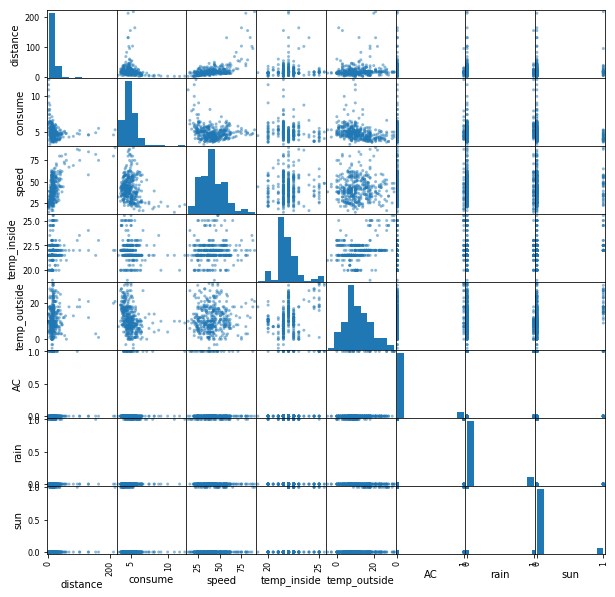

In [58]:
# 散布図行列を描画する
pd.plotting.scatter_matrix(df_consume_ext, figsize=(10,10))
plt.show()

In [59]:
# consumeが第１列にくるよう列の順番を入れ替える
df_consume_ext = df_consume_ext.iloc[:,[1,0,3,4,5,6,7,8]]

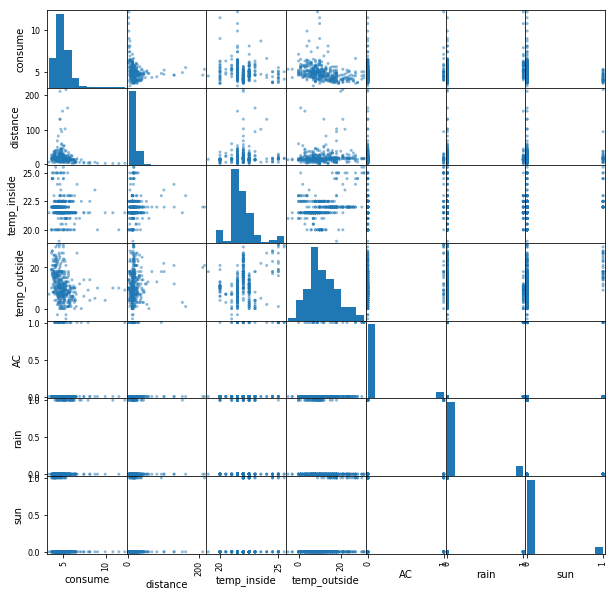

In [60]:
# 再度、散布図行列を描画する
pd.plotting.scatter_matrix(df_consume_ext, figsize=(10,10))
plt.show()

In [61]:
# 相関係数を出力する
df_consume_ext.corr()

,consume,distance,temp_inside,temp_outside,AC,rain,sun
consume,1.000000,-0.128967,-0.161991,-0.320811,0.096591,0.248118,-0.170667
distance,-0.128967,1.000000,0.075305,0.088175,-0.025738,-0.019791,0.081120
temp_inside,-0.161991,0.075305,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,-0.320811,0.088175,0.361308,1.000000,0.167562,-0.186315,0.346903
AC,0.096591,-0.025738,0.297775,0.167562,1.000000,0.242915,0.088598
rain,0.248118,-0.019791,-0.037356,-0.186315,0.242915,1.000000,-0.112650
sun,-0.170667,0.081120,0.246120,0.346903,0.088598,-0.112650,1.000000


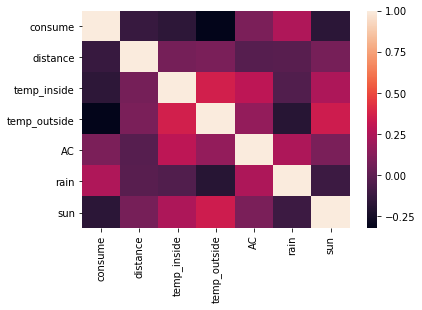

In [62]:
# 相関係数を色で確認する
sns.heatmap(df_consume_ext.corr())

In [63]:
# （相関のありそうな説明変数が見当たらないが）線形回帰モデルに入れてみる。
# temp_insideはレコード数が足りてないので除外した。
y = df_consume_ext["consume"].values
X = df_consume_ext[['distance', 'temp_outside', 'AC', 'rain', 'sun']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# 学習したモデルで予測値を算出する
y_est = regr.predict(X)

In [65]:
# 実際のconsumeとの2乗誤差の平均を算出する
mse = mean_squared_error(y, y_est)
print("MSE={:.3f}".format(mse))

#絶対値の差の平均を算出する
mae = mean_absolute_error(y, y_est)
print("MAE={:.3f}".format(mae))
#MSEの平方根を算出する
rmse = np.sqrt(mse)
print("RMSE={:.3f}".format(rmse))

MSE=0.892
MAE=0.607
RMSE=0.944


### ここからは試しにやってみたこと

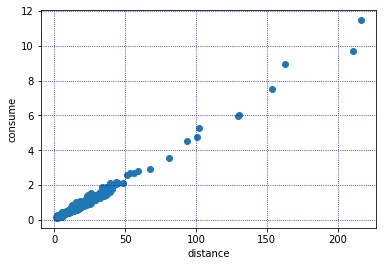

In [67]:
# distanceをX軸に実際のガソリン消費量をY軸にして描画してみる
consume = df_consume_ext["consume"].values
distance = df_consume_ext["distance"].values

actual_consume = distance / 100 * consume
plt.scatter(distance, actual_consume, marker='o')
plt.xlabel('distance')
plt.ylabel('consume')
plt.grid(which='major', color='blue', linestyle=':')

In [68]:
# ガソリンタイプがE10のレコードを抽出する
df_consume_ext_E10 = df_consume_ext.copy()[(df_consume_ext["gas_type"]=="E10")]

In [69]:
# データの概要を確認する
df_consume_ext_E10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 348
Data columns (total 8 columns):
consume         160 non-null float64
distance        160 non-null float64
temp_inside     157 non-null float64
temp_outside    160 non-null int64
gas_type        160 non-null object
AC              160 non-null int64
rain            160 non-null int64
sun             160 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 11.2+ KB


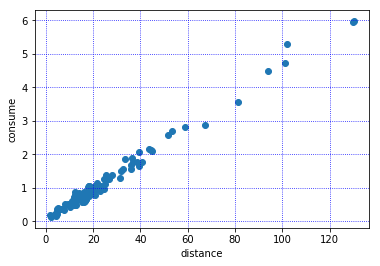

In [70]:
# ガソリンタイプE10を使ったときのdistanceと実際の消費量をグラフにしてみる
consume = df_consume_ext_E10["consume"].values
distance = df_consume_ext_E10["distance"].values
actual_consume = distance / 100 * consume
plt.scatter(distance, actual_consume, marker='o')
plt.xlabel('distance')
plt.ylabel('consume')
plt.grid(which='major', color='blue', linestyle=':')

In [32]:
df_consume_ext["gas_type"].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [71]:
# ガソリンタイプがSP98のレコードを抽出する
df_consume_ext_SP98 = df_consume_ext.copy()[(df_consume_ext["gas_type"]=="SP98")]

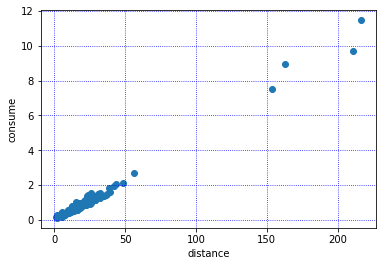

In [72]:
# ガソリンタイプがSP98を使ったときのdistanceと実際のガソリン消費量をグラフ化する
consume = df_consume_ext_SP98["consume"].values
distance = df_consume_ext_SP98["distance"].values
actual_consume = distance/100 * consume
plt.scatter(distance, actual_consume, marker='o')
plt.xlabel('distance')
plt.ylabel('consume')
plt.grid(which='major', color='blue', linestyle=':')